# 구대웅

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#1
data=pd.read_csv("../data/공공자전거 대여이력 정보_202006.csv", encoding='CP949')

In [3]:
data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0
1,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0
2,SPB-31969,2020-06-01 00:02:43,1306,한성대입구역2번출구,0,2020-06-01 00:06:59,388,동성중학교 앞,0,4,0.0
3,SPB-19763,2020-06-01 00:00:16,956,응암시장교차로,8,2020-06-01 00:08:25,939,은평구청 교차로,6,7,1340.0
4,SPB-32949,2020-06-01 00:04:20,709,신정3동 현장민원실 앞,0,2020-06-01 00:08:53,712,강월초교입구 사거리,0,5,0.0


In [4]:
#2
data.groupby(["대여 대여소번호"])["대여 대여소명"].count().sort_values(ascending=False).head(5)

대여 대여소번호
207     10682
502     10504
152      7710
2102     7382
2701     6053
Name: 대여 대여소명, dtype: int64

In [5]:
#3
data.groupby(["반납대여소번호"])["반납대여소명"].count().sort_values(ascending=False).head(5)

반납대여소번호
502     11424
207     10876
152      8323
2102     7407
2219     6229
Name: 반납대여소명, dtype: int64

In [6]:
data_대여=pd.DataFrame(data.대여일시.str[8:10])
data_대여["대여반납"]="대여"
data_대여
data_대여.columns = ["date", "대여반납"]

data_반납=pd.DataFrame(data.반납일시.str[8:10])
data_반납["대여반납"]="반납"
data_반납
data_반납.columns = ["date", "대여반납"]
data_대여반납=pd.concat([data_대여,data_반납])
data_대여반납.head()

,date,대여반납
0,01,대여
1,01,대여
2,01,대여
3,01,대여
4,01,대여


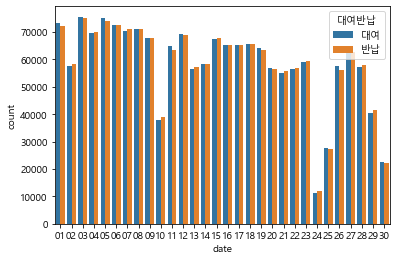

In [7]:
#4
sns.countplot(x='date', data=data_대여반납, hue='대여반납')
plt.show()

In [8]:
aa=[]
for i in range(len(data["대여 대여소번호"])):
    if data["대여 대여소번호"][i]==data["반납대여소번호"][i]:
        aa.append(1)
    else:
        aa.append(0)

In [9]:
data["대여반납동일유무"]=aa
data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여반납동일유무
0,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.0,0
1,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.0,0
2,SPB-31969,2020-06-01 00:02:43,1306,한성대입구역2번출구,0,2020-06-01 00:06:59,388,동성중학교 앞,0,4,0.0,0
3,SPB-19763,2020-06-01 00:00:16,956,응암시장교차로,8,2020-06-01 00:08:25,939,은평구청 교차로,6,7,1340.0,0
4,SPB-32949,2020-06-01 00:04:20,709,신정3동 현장민원실 앞,0,2020-06-01 00:08:53,712,강월초교입구 사거리,0,5,0.0,0


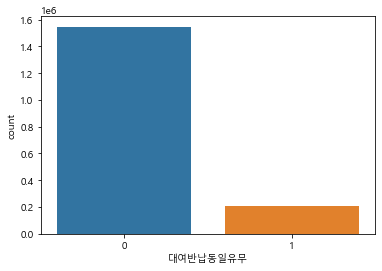

In [10]:
#5
sns.countplot(x='대여반납동일유무', data=data)
plt.show()

In [11]:
#6
data.groupby(["자전거번호"]).count()["대여일시"].sort_values(ascending=False).head(5)

자전거번호
SPB-31583    407
SPB-31923    397
SPB-34392    389
SPB-30894    388
SPB-33576    386
Name: 대여일시, dtype: int64

In [12]:
data_대여시간=pd.DataFrame(data.대여일시.str[11:13])
data_대여시간["대여반납"]="대여"
data_대여시간
data_대여시간.columns = ["time", "대여반납"]

data_반납시간=pd.DataFrame(data.반납일시.str[11:13])
data_반납시간["대여반납"]="반납"
data_반납시간
data_반납시간.columns = ["time", "대여반납"]
data_대여반납시간=pd.concat([data_대여시간,data_반납시간])
data_대여반납시간.head()

,time,대여반납
0,00,대여
1,00,대여
2,00,대여
3,00,대여
4,00,대여


In [13]:
data_대여반납시간["bb"]=1
data_대여반납시간_re=data_대여반납시간.groupby(["time","대여반납"]).bb.count().reset_index()

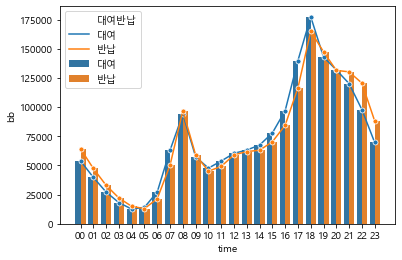

In [14]:
sns.barplot(x='time',y="bb", data=data_대여반납시간_re,hue="대여반납")
sns.lineplot(x='time',y="bb", data=data_대여반납시간_re,hue="대여반납",marker='o', markersize=5)
plt.show()